In [19]:
# Import libraries necessary for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
dataset = pd.read_csv(r"C:\Users\moumi\Desktop\Busniess Analytucs\Sem 2\Machine learning\data.data")
pd.DataFrame(dataset,columns=dataset.columns[:-1])
dataset.head()

,Id_number,Diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean-concavity,mean_concave_points,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst-concavity,worst_concave_points,worst_symetry,worst_fractal_dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
# find nulls

nulls = dataset.isnull().sum()
nulls = nulls.sum()
# no nulls, 31 cols, great
print('\nThere are', dataset.shape[0],'rows in the dataset')
print('There are', dataset.shape[1],'columns (features) in the dataset')
print('There are {}'.format(nulls),'nulls in the dataset')


There are 569 rows in the dataset
There are 32 columns (features) in the dataset
There are 0 nulls in the dataset


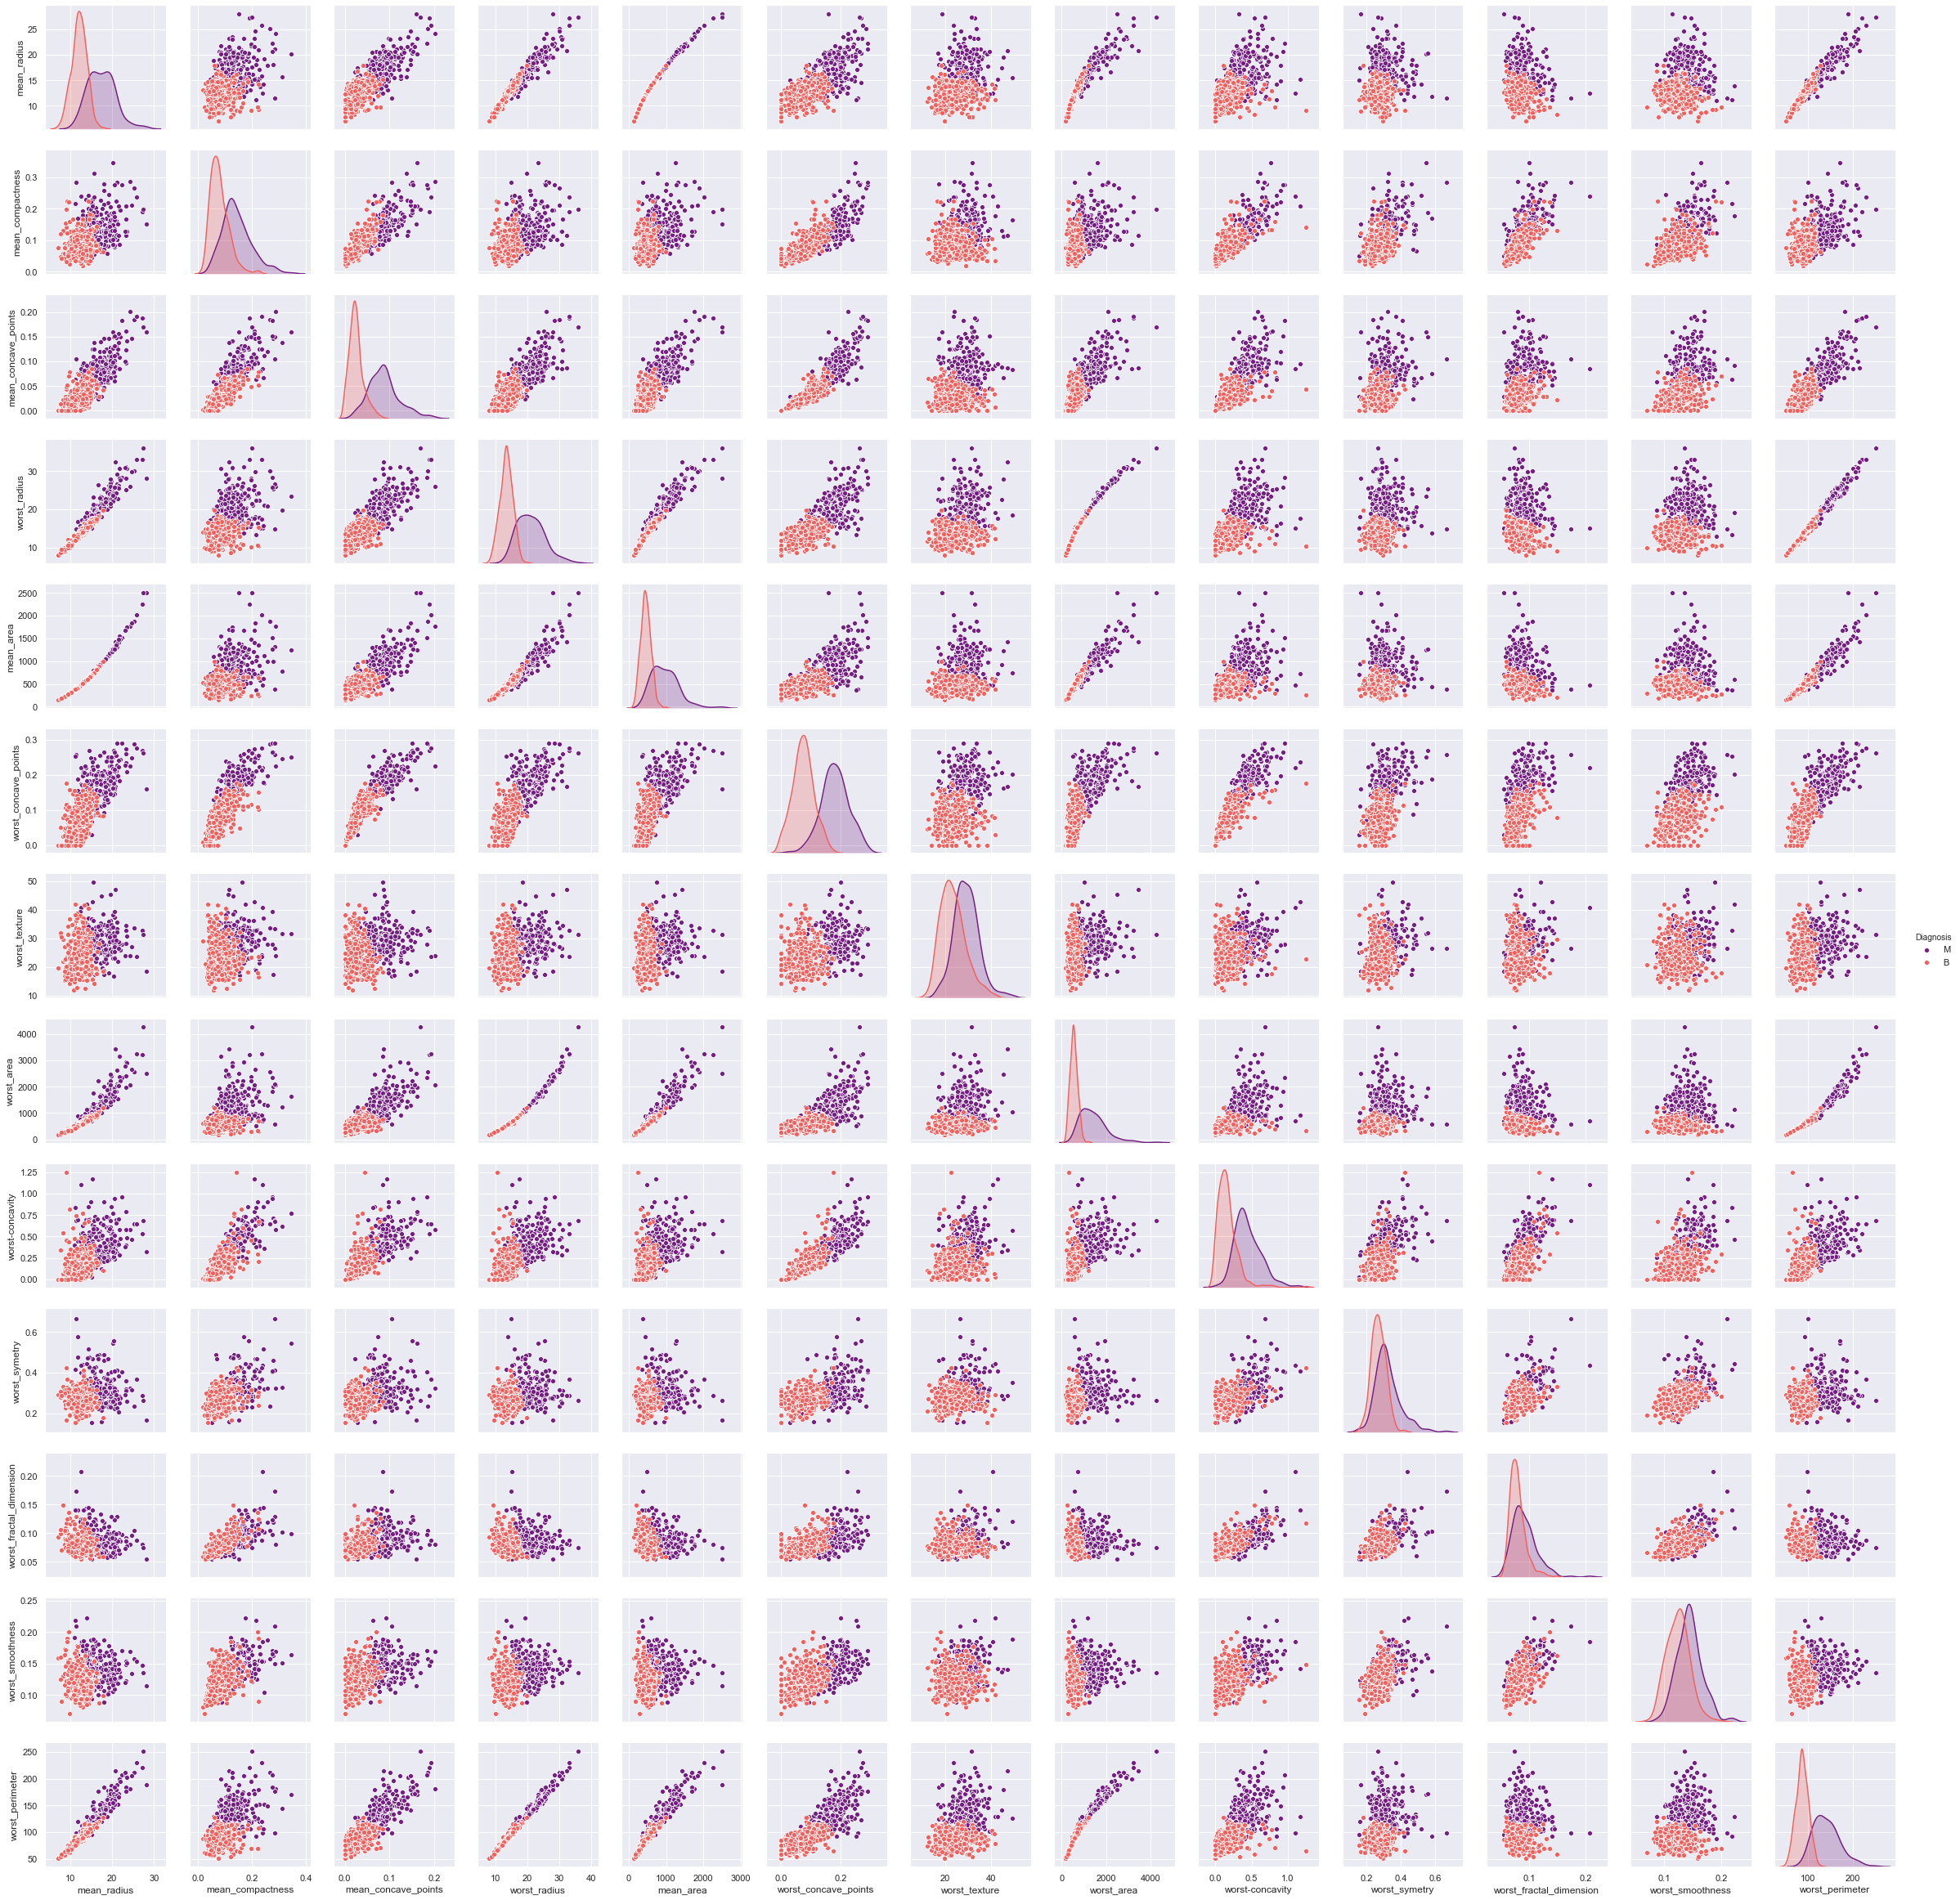

In [146]:
#Visualinzing all features

sns.set()
sns.pairplot(data=dataset_befs, hue = 'Diagnosis', palette ='magma')

In [47]:
scaled_features = scaler.transform(dataset.drop('Diagnosis',axis=1))
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,dataset['Diagnosis'],
                                                    test_size=0.30, random_state=101)

In [48]:
#kneighbours
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [49]:
pred = knn.predict(X_test)

In [50]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))

[[101   4]
 [  5  61]]


In [51]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           B       0.95      0.96      0.96       105
           M       0.94      0.92      0.93        66

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



In [52]:
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

--------------- mean error calculation [Done]


Text(0, 0.5, 'Error Rate')

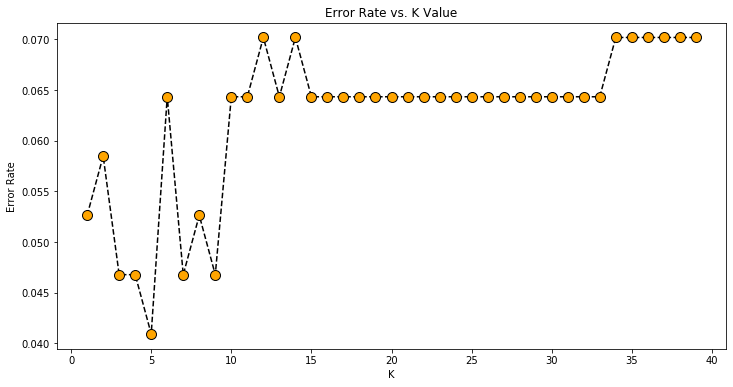

In [53]:
print('--------------- mean error calculation [Done]')
plt.figure(figsize=(12,6))
plt.plot(range(1,40),error_rate,color='black', linestyle='dashed', marker='o',
         markerfacecolor='orange', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [54]:
# original K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[101   4]
 [  5  61]]


              precision    recall  f1-score   support

           B       0.95      0.96      0.96       105
           M       0.94      0.92      0.93        66

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



In [55]:
# K=5
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=5')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=5


[[104   1]
 [  6  60]]


              precision    recall  f1-score   support

           B       0.95      0.99      0.97       105
           M       0.98      0.91      0.94        66

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [56]:
dectree = DecisionTreeClassifier()
dectree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [57]:
print('----------------------------prediction')
predictions = dectree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

----------------------------prediction
[[99  6]
 [ 8 58]]
              precision    recall  f1-score   support

           B       0.93      0.94      0.93       105
           M       0.91      0.88      0.89        66

    accuracy                           0.92       171
   macro avg       0.92      0.91      0.91       171
weighted avg       0.92      0.92      0.92       171



In [58]:
#naive bayes
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
naive.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [59]:
Y_pred = naive.predict(X_test)

In [60]:
from sklearn.metrics import classification_report, confusion_matrix
print ("----------------------> [GaussianNB]")
print(confusion_matrix(y_test, Y_pred))
print(classification_report(y_test, Y_pred))

----------------------> [GaussianNB]
[[99  6]
 [ 8 58]]
              precision    recall  f1-score   support

           B       0.93      0.94      0.93       105
           M       0.91      0.88      0.89        66

    accuracy                           0.92       171
   macro avg       0.92      0.91      0.91       171
weighted avg       0.92      0.92      0.92       171

